In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

original_data = pd.read_csv('/content/surv_variants_cleaned.csv')  # Update with correct path

In [11]:
#generate summary statistics
def generate_summary_statistics_limited(df):
    summary = {}

    #statistics for Numerical Columns and droping 'first_seq' and 'last_seq' columns
    numerical_columns = df.select_dtypes(include=['number']).drop(columns=['first_seq', 'last_seq'], errors='ignore')
    summary['Descriptive Statistics'] = numerical_columns.describe().round(3)

    # unique count
    unique_values = pd.DataFrame({
        'Metric': ['Countries', 'Variants', 'Continents'],
        'Unique Count': [df['Country'].nunique(), df['variant'].nunique(), df['Continent'].nunique()]
    })

    summary['Unique Values'] = unique_values

    return summary

# generate summary statistics
summary_statistics = generate_summary_statistics_limited(original_data)


print("\n Descriptive Statistics:")
print(tabulate(summary_statistics['Descriptive Statistics'], headers='keys', tablefmt='pretty'))

print("\n Unique Values:")
print(tabulate(summary_statistics['Unique Values'], headers='keys', tablefmt='pretty'))


🔹 Descriptive Statistics:
+-------+----------+----------------+-------------+--------------+-------------+
|       | duration | mortality_rate | total_cases | total_deaths | growth_rate |
+-------+----------+----------------+-------------+--------------+-------------+
| count |  3116.0  |     3116.0     |   3116.0    |    3116.0    |   3116.0    |
| mean  | 187.689  |     0.018      |  4707.544   |    80.278    |  1204.825   |
|  std  | 127.959  |     0.011      |  9368.208   |   166.335    |  1842.165   |
|  min  |   1.0    |      0.0       |    0.083    |     0.0      |     0.0     |
|  25%  |   85.0   |     0.011      |   78.257    |    0.945     |   129.723   |
|  50%  |  170.0   |     0.016      |   703.592   |    10.283    |   701.685   |
|  75%  |  268.0   |     0.023      |  4033.003   |    66.489    |  1133.833   |
|  max  |  758.0   |     0.064      |  56620.899  |   979.831    |  10629.928  |
+-------+----------+----------------+-------------+--------------+-------------+



In [12]:
# top 10 countries with the highest number of cases
top_10_cases = original_data.groupby('Country')['total_cases'].sum().nlargest(10).reset_index()
top_10_cases['total_cases'] = top_10_cases['total_cases'].astype(int).apply(lambda x: f"{x:,}")

# top 10 countries with the highest number of deaths
top_10_deaths = original_data.groupby('Country')['total_deaths'].sum().nlargest(10).reset_index()
top_10_deaths['total_deaths'] = top_10_deaths['total_deaths'].astype(int).apply(lambda x: f"{x:,}")

print("\n Top 10 Countries by Total Cases:")
print(tabulate(top_10_cases, headers='keys', tablefmt='pretty', numalign="right"))

print("\n Top 10 Countries by Total Deaths:")
print(tabulate(top_10_deaths, headers='keys', tablefmt='pretty', numalign="right"))


 Top 10 Countries by Total Cases:
+---+--------------------+-------------+
|   |      Country       | total_cases |
+---+--------------------+-------------+
| 0 |       Panama       |   363,137   |
| 1 |      Morocco       |   351,822   |
| 2 |       Spain        |   324,262   |
| 3 |      Malaysia      |   323,897   |
| 4 | Dominican Republic |   291,812   |
| 5 |     Lithuania      |   286,182   |
| 6 |     Venezuela      |   261,677   |
| 7 |      Ireland       |   259,985   |
| 8 |      Belarus       |   256,054   |
| 9 |     Costa Rica     |   246,478   |
+---+--------------------+-------------+

 Top 10 Countries by Total Deaths:
+---+-----------------+--------------+
|   |     Country     | total_deaths |
+---+-----------------+--------------+
| 0 |     Tunisia     |    7,606     |
| 1 |     Ecuador     |    6,330     |
| 2 |     Panama      |    6,205     |
| 3 |     Morocco     |    5,675     |
| 4 |      Spain      |    5,637     |
| 5 |     Croatia     |    5,316     |
| 6 

In [14]:
# top 10 variants with the longest duration
top_10_longest_duration = original_data.groupby('variant')['duration'].max().nlargest(10).reset_index()
top_10_longest_duration['duration'] = top_10_longest_duration['duration'].astype(int)

#top 10 variants with the shortest duration
top_10_shortest_duration = original_data.groupby('variant')['duration'].max().nsmallest(10).reset_index()
top_10_shortest_duration['duration'] = top_10_shortest_duration['duration'].astype(int)

#top 10 variants with the highest mortality rates
top_10_highest_mortality = original_data.loc[
    original_data.groupby('variant')['mortality_rate'].idxmax(),
    ['variant', 'mortality_rate', 'total_cases', 'total_deaths']
].nlargest(10, 'mortality_rate')


top_10_highest_mortality['mortality_rate'] = top_10_highest_mortality['mortality_rate'].apply(lambda x: f"{x:.3f}")
top_10_highest_mortality['total_cases'] = top_10_highest_mortality['total_cases'].apply(lambda x: f"{x:,.3f}")
top_10_highest_mortality['total_deaths'] = top_10_highest_mortality['total_deaths'].apply(lambda x: f"{x:,.3f}")

# Top 10 variants with the lowest mortality rates
top_10_lowest_mortality = original_data.loc[
    original_data.groupby('variant')['mortality_rate'].idxmax(),
    ['variant', 'mortality_rate', 'total_cases', 'total_deaths']
].nsmallest(10, 'mortality_rate')


top_10_lowest_mortality['mortality_rate'] = top_10_lowest_mortality['mortality_rate'].apply(lambda x: f"{x:.3f}")
top_10_lowest_mortality['total_cases'] = top_10_lowest_mortality['total_cases'].apply(lambda x: f"{x:,.3f}")
top_10_lowest_mortality['total_deaths'] = top_10_lowest_mortality['total_deaths'].apply(lambda x: f"{x:,.3f}")


print("\n Top 10 Variants with Longest Duration:")
print(tabulate(top_10_longest_duration, headers='keys', tablefmt='pretty'))

print("\n Top 10 Variants with Shortest Duration:")
print(tabulate(top_10_shortest_duration, headers='keys', tablefmt='pretty'))

print("\n Top 10 Variants with Highest Mortality Rates:")
print(tabulate(top_10_highest_mortality, headers='keys', tablefmt='pretty'))

print("\n Top 10 Variants with Lowest Mortality Rates:")
print(tabulate(top_10_lowest_mortality, headers='keys', tablefmt='pretty'))


 Top 10 Variants with Longest Duration:
+---+---------------+----------+
|   |    variant    | duration |
+---+---------------+----------+
| 0 | DanishCluster |   758    |
| 1 |    S.E484     |   650    |
| 2 |     S.L18     |   631    |
| 3 |    S.H69-     |   629    |
| 4 |    S.A222     |   628    |
| 5 |    S.Q677     |   619    |
| 6 |    S.S477     |   612    |
| 7 |    S.T572     |   611    |
| 8 |    S.Y144-    |   606    |
| 9 |    S.N439K    |   597    |
+---+---------------+----------+

 Top 10 Variants with Shortest Duration:
+---+------------------+----------+
|   |     variant      | duration |
+---+------------------+----------+
| 0 |   Delta.N.412R   |    61    |
| 1 | 21A.Delta.S.K417 |   218    |
| 2 |    Delta.145H    |   221    |
| 3 |    Delta.299I    |   234    |
| 4 |    20B.S.796H    |   254    |
| 5 |    20A.S.126A    |   255    |
| 6 |    21I.Delta     |   262    |
| 7 |  S.Q677H.Robin2  |   263    |
| 8 |    21B.Kappa     |   289    |
| 9 |    21G.Lambda    

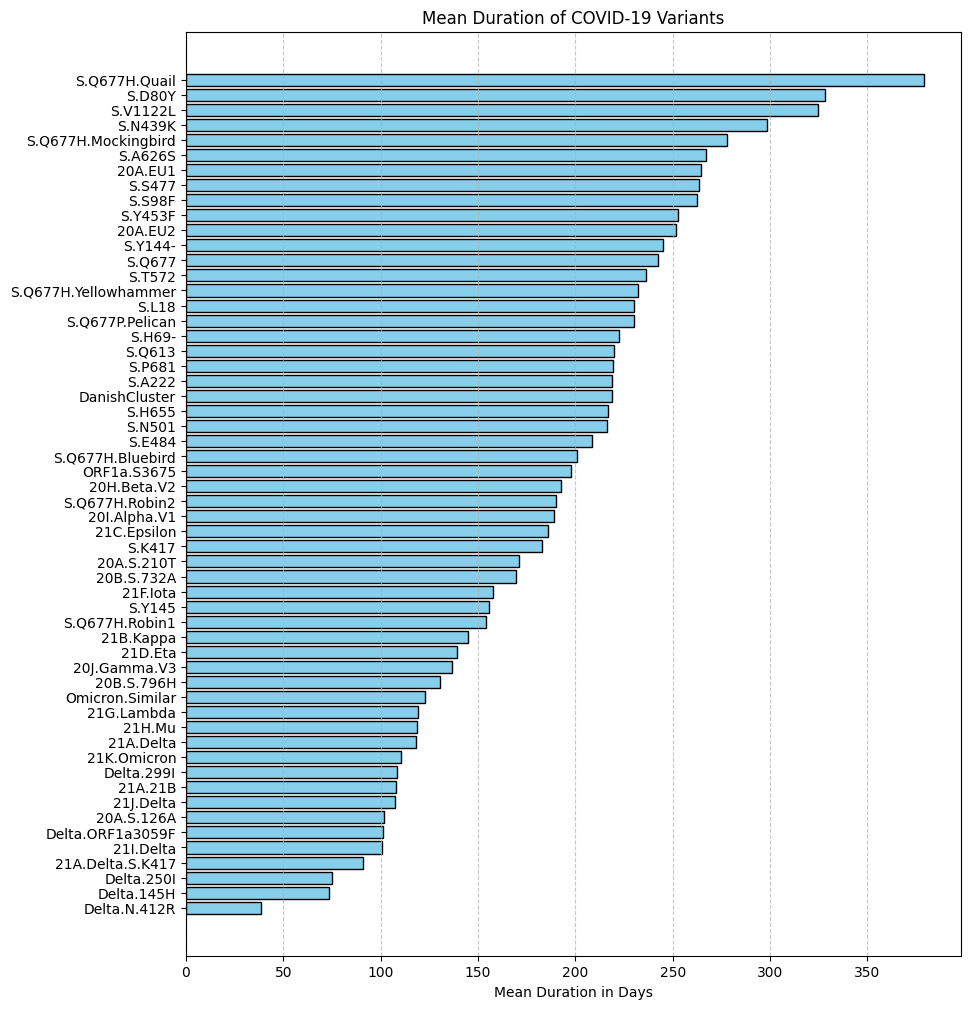

In [29]:
#mean duration by variant
mean_duration_by_variant = original_data.groupby('variant')['duration'].mean().reset_index()
mean_duration_by_variant = mean_duration_by_variant.sort_values(by='duration', ascending=False)

# chart plot
fig, ax = plt.subplots(figsize=(10, 12))
y_positions = range(len(mean_duration_by_variant))
ax.barh(y_positions, mean_duration_by_variant['duration'], color='skyblue', edgecolor='black', align='center')

# formatting the plot
ax.set_yticks(y_positions)
ax.set_yticklabels(mean_duration_by_variant['variant'])  # Show labels on the left

ax.set_xlabel("Mean Duration in Days")
ax.set_title("Mean Duration of COVID-19 Variants")

ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
